# Assignment 1: Web Scraping

## Objective

Data scientists often need to crawl data from websites and turn the crawled data (HTML pages) to structured data (tables). Thus, web scraping is an essential skill that every data scientist should master. In this assignment, you will learn the followings:


* How to download HTML pages from a website?
* How to extract relevant content from an HTML page? 

Furthermore, you will gain a deeper understanding of the data science lifecycle.

**Requirements:**

1. Please use [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) rather than spark.DataFrame to manipulate data.

2. Please use [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) rather than [lxml](http://lxml.de/) to parse an HTML page and extract data from the page.

3. Please follow the python code style (https://www.python.org/dev/peps/pep-0008/). If TA finds your code hard to read, you will lose points. This requirement will stay for the whole semester.

## Preliminary

If this is your first time to write a web scraper, you need to learn some basic knowledge of this topic. I found that this is a good resource: [Tutorial: Web Scraping and BeautifulSoup](https://realpython.com/beautiful-soup-web-scraper-python/). 

Please let me know if you find a better resource. I'll share it with the other students.

## Overview

Imagine you are a data scientist working at HKUST(GZ). Your job is to extract insights from HKUST(GZ) data to answer questions. 

In this assignment, you will do two tasks. Please recall the high-level data science lifecycle from Lecture 1. I suggest that when doing this assignment, please remind yourself of what data you collected and what questions you tried to answer.

## Task 1: HKUST(GZ) Information Hub Faculty Members

Sometimes you don't know what questions to ask. No worries. Start collecting data first. 

In Task 1, your job is to write a web scraper to extract the faculty information from this page: [https://facultyprofiles.hkust-gz.edu.cn/](https://facultyprofiles.hkust-gz.edu.cn/).




### (a) Crawl Web Page

A web page is essentially a file stored in a remote machine (called web server). Please write code to download the HTML page and save it as a text file ("infhfaculty.html").

In [1]:
"""
Project Statement:
    AS the website we scrape is dynamically loaded,I have to use some other techniches like Selenium to 
    render the web page and then obtain the complete HTML or make some mock click operation 
    to get the information wanted when there are some button elements in the web page and after I click it, 
    the dom will be reloaded and display some new informaion.
    Finally, I will follow the requirements above to use BeautifulSoup and Pandas.DataFrame to extract and deal with data.

Environment Requirement:
    Having the Chrome program and the corresponding ChromeDriver is a prerequisite for running this program. 
    The chromedriver in the current directory is compatible with Chrome version 116.

Output File Statement:
    ANSWER to Task 1 a: infhfaculty.html
    ANSWER to Task 1 b: faculty_table.csv   Please note you can get a more sepecific version of faculty information in the faculty.csv

    ANSWER to Task 2 a: all the files in the DIR task2
    ANSWER to Task 2 b:faculty_grad_year.csv
"""



# write your code
import time
from selenium import webdriver
from bs4 import BeautifulSoup

url = "https://facultyprofiles.hkust-gz.edu.cn/"

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
exe_path = "./chromedriver.exe"
browser = webdriver.Chrome(executable_path=exe_path,options=options)

browser.get(url=url)
time.sleep(1)

#The initial webpage displays all the teachers, and it requires simulating a click to filter and obtain information only for the 'infh' teachers.
hubs = browser.find_elements_by_class_name('hub-item')
hubs[2].click()

#sleep(1) to ensure the selenium render the page completely                                      
time.sleep(1)
infh_html = browser.page_source

soup = BeautifulSoup(infh_html,'html.parser')
with open("./infhfaculty.html",'w') as f:
    f.write(soup.prettify())


### (b) Extract Structured Data

Please write code to extract relevant content (name, rank, area, profile, homepage, ...) from "infhfaculty.html" and save them as a CSV file (save as "faculty_table.csv"). 

In [2]:
import requests,json

#this url comes from the analysis of network requests and responses when we enter the ALL Faculty page.
#As mentioned in the email, we cannot retrieve the profile links of the teachers from the HTML directly. 
#We can only obtain these links by analyzing network behavior and simulating that behavior.
id_table = requests.get("https://facultyprofiles.hkust-gz.edu.cn/facultyprofile/external/profile/page?&languageType=en&size=1000&pages=1&dataSourcesCodes=OUTSIDE_NC")

def generate_path(first_name:str,last_name:str,id:str)->str:
    """
    the profile path consists of the first_name,last_name and id.
    The princible to generate the path is described in code below.
    """
    prefix_path = "https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/"
    name = ''
    if ' ' not in first_name:
        name = last_name+'-'+first_name
    else:
        fnl = first_name.split()
        fn = ''
        for word in fnl:
            fn+=word
        name = last_name+'-'+fn
    return prefix_path+name+'/'+id

t = id_table.text
json_ = json.loads(t)
faculty_map = {}
for faculty_json in json_['data']['list']:
    faculty_map[faculty_json['name']] = faculty_json

import pandas as pd

df = pd.DataFrame(faculty_map)
ddf = df.T
ddf.set_index(['name'],inplace=True)

df = ddf



df['school website'] = df.apply(lambda x:generate_path(x['firstName'],x['lastName'],x['id']),axis=1)
df.to_csv('faculty.csv')



df_super_faculty = pd.read_csv('faculty.csv')
df_super_faculty

name                   id   sort  \
0             陈雷                  125  10100   
1            冯志雄  1597712010496446464  10100   
2             许彬                  341  10100   
3            刘启汉  1633950796255334400  10100   
4            刘坚能  1648446319846756352  10100   
..           ...                  ...    ...   
282  FANG GENGFA  1621391877221912576  13100   
283           张晨  1701354998665056257  13100   
284          车伟涛  1634313186528464897  13300   
285           陈力  1658230784294916096  13300   
286           郭素                 2533  13300   

                                                 photo lastName firstName  \
0                                                   []     CHEN       Lei   
1    [{'urlHost': 'https://oss.hkust-gz.edu.cn/itc-...     FUNG  Chi Hung   
2                                                   []      HUI       Pan   
3    [{'urlHost': 'https://oss.hkust-gz.edu.cn/itc-...      LAU   Kai-Hon   
4                                                   []      LAU  Kin Nang   
..                                                 ...      ...       ...   
282  [{'urlHost': 'https://oss.hkust-gz.edu.cn/itc-...     FANG    GENGFA   
283                                                 []    ZHANG      Chen   
284  [{'urlHost': 'https://oss.hkust-gz.edu.cn/itc-...      CHE    Weitao   
285                                                 []     CHEN        Li   
286  [{'urlHost': 'https://oss.hkust-gz.edu.cn/itc-...      GUO        Su   

    tcName                enName                        email emailAlias  ...  \
0       陳雷              Lei CHEN      leichen@hkust-gz.edu.cn        NaN  ...   
1      馮志雄   Jimmy Chi Hung FUNG               majfung@ust.hk        NaN  ...   
2       許彬               Pan HUI       panhui@hkust-gz.edu.cn        NaN  ...   
3      劉啟漢    Alexis Kai-Hon LAU                  alau@ust.hk        NaN  ...   
4      劉堅能  Vincent Kin Nang LAU               eeknlau@ust.hk        NaN  ...   
..     ...                   ...                          ...        ...  ...   
282    NaN           GENGFA FANG   gengfafang@hkust-gz.edu.cn        NaN  ...   
283    NaN            Chen ZHANG    chenzhang@hkust-gz.edu.cn        NaN  ...   
284    NaN            Weitao CHE    weitaoche@hkust-gz.edu.cn        NaN  ...   
285    NaN               Li CHEN  chenlimeust@hkust-gz.edu.cn        NaN  ...   
286    NaN                Su GUO        suguo@hkust-gz.edu.cn        NaN  ...   

                                                  jobs hkFilesVo  \
0    [{'id': '1701717468596408321', 'personId': '12...       NaN   
1    [{'id': '1701717469355577344', 'personId': '15...       NaN   
2    [{'id': '1701717469967945728', 'personId': '34...       NaN   
3    [{'id': '1701717471133962240', 'personId': '16...       NaN   
4    [{'id': '1701717471658250240', 'personId': '16...       NaN   
..                                                 ...       ...   
282  [{'id': '1701717814760706049', 'personId': '16...       NaN   
283  [{'id': '1701717815377268736', 'personId': '17...       NaN   
284  [{'id': '1701717817298259968', 'personId': '16...       NaN   
285  [{'id': '1701717818330058753', 'personId': '16...       NaN   
286  [{'id': '1701717821043773441', 'personId': '25...       NaN   

                 pkPsndoc affiliatedUnits endDate  \
0    00011A10000000003EM4             NaN  2005.0   
1    00011A1000000000TOHA             NaN  1990.0   
2    00011A10000000009MLD             NaN  2008.0   
3    00011A1000000000YKUL             NaN  1991.0   
4    00011A100000000109IJ             NaN  1998.0   
..                    ...             ...     ...   
282  00011A1000000000TU36             NaN  2007.0   
283  00011A10000000015F6H             NaN     NaN   
284  00011A1000000000XNOT             NaN  2014.0   
285  00011A1000000000MUM8             NaN  2018.0   
286  00011A1000000000LVZH             NaN  2019.0   

                              schoolName              pkPsnjob  \
0                

In [19]:
import pandas as pd
import re
html = ''
with open('./infhfaculty.html','r') as f:
    html = f.read()
soup = BeautifulSoup(html,'html.parser')
#trs is the list to store data in a table, we can iterate through it to get some info about name,rank and so on.
#but the more specific info like office or homepage is in the page of their personal profile
trs = soup.find_all('tr',class_="el-table__row")
df_part_faculty = pd.DataFrame(columns=['name','rank','email','profile','office','area','homepage'])
df_super_faculty = pd.read_csv('faculty.csv')

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
exe_path = "./chromedriver.exe"
browser = webdriver.Chrome(executable_path=exe_path,options=options)

for tr in trs:
    tds = tr.find_all('td')
    td_list = []
    for td in tds[0:5:2]:
        td_list.append(td.text.strip())
    td_list[1]= td_list[1].replace('\n',' ')
    td_list[1] = re.sub('\s{3,}', ', ', td_list[1])
    name = td_list[0]

    # get personal profile link and get there
    profile = df_super_faculty["school website"][df_super_faculty['enName']==name]
    profile = profile.values[0]
    td_list.append(profile)
    browser.get(profile)
    time.sleep(1)


    # parse the info on the profile page
    soup = BeautifulSoup(browser.page_source)
    s = soup.find_all(class_="el-tabs__item is-top")
    count = len(s)

    #As not everyone has the projects field in their profile page,we need to locate the research button and stimulate click to render the page.
    browser.find_element_by_xpath("//*[text()='RESEARCH INTEREST']").click()
    time.sleep(1)
    html = browser.page_source
    soup = BeautifulSoup(html,'html.parser')

    #Parse the HTML with BeautifulSoup
    card_left = soup.find('div',class_='card-left')

    card_objs = card_left.find('div',class_="card-object-wrap")
 
    card_objs = card_objs.find_all(class_='card-object')

    office_card = card_objs[1]
    office = soup.find('p',class_='icon-text').text.strip()
    homepage_card = card_objs[2]

    homepage = homepage_card.find('a').get('href')
    fields = soup.find('div',class_='overview-div')
    fields = fields.find_all('p')
    field_content = ''
    for field in fields:
        if field_content == '':
            field_content = field.text
        else:
            field_content = field_content + ',' + field.text
    

    for i in [office,field_content,homepage]:
        td_list.append(i)
    print(td_list)
    df_part_faculty.loc[len(df_part_faculty.index)] = td_list
    
df_part_faculty.to_csv('faculty_table.csv')
df_part_faculty
# we have got all the information we need in this project indeed, I won't include comments in the following code.

['Lei CHEN', 'Chair Professor', 'leichen@hkust-gz.edu.cn', 'https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/CHEN-Lei/125', 'E3 L5 511', 'Data-driven machine learning,Crowdsourcing-based data processing,Uncertain and probabilistic databases,Web information management,Multimedia systems', 'https://facultyprofiles.ust.hk/profiles.php?profile=lei-chen-leichen']
['Pan HUI', 'Chair Professor, Chair Professor', 'panhui@hkust-gz.edu.cn', 'https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/HUI-Pan/341', 'E1 L6 605', 'Mobile computing,Computer networking,Data analytics,Human-computer interaction', 'https://panhui.people.ust.hk']
['Vincent Kin Nang LAU', 'Chair Professor, Chair Professor', 'eeknlau@ust.hk', 'https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/LAU-KinNang/1648446319846756352', 'CWB Room 2416', 'Stochastic Optimization and Analysis for wireless systems,Massive MIMO Systems,Sparse Recovery,Bayesian Inferencing,Mission-Critical IoT,PHY Caching for W

name                                               rank  \
0               Lei CHEN                                    Chair Professor   
1                Pan HUI                   Chair Professor, Chair Professor   
2   Vincent Kin Nang LAU                   Chair Professor, Chair Professor   
3       Irene Man Chi Lo                   Chair Professor, Chair Professor   
4   Lionel Ming-Shuan NI  Chair Professor, Chair Professor, Chair Professor   
..                   ...                                                ...   
69             Liang TAN                        Adjunct Associate Professor   
70            Dian ZHANG                        Adjunct Associate Professor   
71             Haijie HU                              Professor of Practice   
72           Bo Wen ZHOU                              Professor of Practice   
73            Chen ZHANG                    Associate Professor of Practice   

                        email  \
0     leichen@hkust-gz.edu.cn   
1      panhui@hkust-gz.edu.cn   
2              eeknlau@ust.hk   
3               cemclo@ust.hk   
4          ni@hkust-gz.edu.cn   
..                        ...   
69                              
70                              
71                              
72  bowenzhou@hkust-gz.edu.cn   
73  chenzhang@hkust-gz.edu.cn   

                                              profile                 office  \
0   https://facultyprofiles.hkust-gz.edu.cn/facult...              E3 L5 511   
1   https://facultyprofiles.hkust-gz.edu.cn/facult...              E1 L6 605   
2   https://facultyprofiles.hkust-gz.edu.cn/facult...          CWB Room 2416   
3   https://facultyprofiles.hkust-gz.edu.cn/facult...  CWB Campus, Room 3570   
4   https://facultyprofiles.hkust-gz.edu.cn/facult...                C1 E L7   
..                                                ...                    ...   
69  https://facultyprofiles.hkust-gz.edu.cn/facult...                          
70  https://facultyprofiles.hkust-gz.edu.cn/facult...                          
71  https://facultyprofiles.hkust-gz.edu.cn/facult...                          
72  https://facultyprofiles.hkust-gz.edu.cn/facult...                          
73  https://facultyprofiles.hkust-gz.edu.cn/facult...                          

                                                 area  \
0   Data-driven machine learning,Crowdsourcing-bas...   
1   Mobile computing,Computer networking,Data anal...   
2   Stochastic Optimization and Analysis for wirel...   
3   Nanotechnology for environmental application,W...   
4   Big data,High-performance computing,Internet t...   
..                                                ...   
69                                                      
70                                                      
71  1）Narrative Space Design,2）Hybrid Field,3）Shy-...   
72                                                      
73                                                      

                                             homepage  
0   https://facultyprofiles.ust.hk/profiles.php?pr...  
1                        https://panhui.people.ust.hk  
2   https://eeknlau.home.ece.ust.hk/HKUST-Office-H...  
3                        http://cemclo.people.ust.hk/  
4                  https://president.hkust-gz.edu.cn/  
..                                                ...  
69                                                     
70                                                     
71                                                     
72                                                     
73                                                     

[74 rows x 7 columns]

### (c) Interesting Finding

Note that you don't need to do anything for Task 1(c). The purpose of this part is to give you some sense about how to leverage Exploratory Data Analysis (EDA) to come up with interesting questions about the data. EDA is an important topic in data science; you will  learn it soon from this course. 


First, please install [dataprep](http://dataprep.ai).
Then, run the cell below. 
It shows a bar chart for every column. What interesting findings can you get from these visualizations? 

In [ ]:
# run this cell will affect the layout of this program!!!!
from dataprep.eda import plot
import pandas as pd

df = pd.read_csv("faculty_table.csv")
plot(df)

Below are some examples:

**Finding 1:** Assistant Professor# (~76) is more than 5x larger than Associate Professor# (10). 

**Questions:** Why did it happen? Is it common in all CS schools in the world? Will the gap go larger or smaller in five years? What actions can be taken to enlarge/shrink the gap?


**Finding 2:** The Homepage has 22% missing values. 

**Questions:** Why are there so many missing values? Is it because many faculty do not have their own homepages or do not add their homepages to the school page? What actions can be taken to avoid this to happen in the future? 

## Task 2: Age Follows Normal Distribution?

In this task, you start with a question and then figure out what data to collect.

The question that you are interested in is `Does HKUST(GZ) Info Hub faculty age follow a normal distribution?`

To estimate the age of a faculty member, you can collect the year in which s/he graduates from a university (`gradyear`) and then estimate `age` using the following equation:

$$age \approx 2023+23 - gradyear$$

For example, if one graduates from a university in 1990, then the age is estimated as 2023+23-1990 = 56. 



### (a) Crawl Web Page

You notice that faculty profile pages contain graduation information. For example, you can see that Dr. Yuyu LUO graduated from Tsinghua University in 2023 at [https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/LUO-Yuyu/yuyuluo](https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/LUO-Yuyu/yuyuluo). 


Please write code to download the profile pages (info hub faculties) and save each page as a text file. 

In [28]:
# Write your code

import time
faculty_pages = list(df['school website'])
for page in faculty_pages:
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
    exe_path = "./chromedriver.exe"
    browser = webdriver.Chrome(executable_path=exe_path,options=options)
    browser.get(url=page)
    time.sleep(1)

    html = browser.page_source
    soup = BeautifulSoup(html,'html.parser')
    file_name = page.split('/')[-2]
    with open("./task2/"+file_name+'.txt','w') as f:
        f.write(soup.prettify())



### (b) Extract Structured Data

Please write code to extract the earliest graduation year (e.g., 2023 for Dr. Yuyu LUO) from each profile page, and create a csv file like [faculty_grad_year.csv](./faculty_grad_year.csv). 

In [65]:
# write your code here
    
import os
df_g = pd.DataFrame(columns=['name','graduate_year'])
file_paths = os.listdir('./task2/')
for file_path in file_paths:
    file_path = './task2/'+file_path
    html = ''
    with open(file_path,'r') as f:
        html = f.read()
    soup = BeautifulSoup(html,'html.parser')
    name = soup.find('h2',class_='english-name')
    name = name.text.strip()
    degree_detail = soup.find('div',class_='degree-detail')
    graduate_year = "".join(list(filter(str.isdigit,degree_detail.text)))

    df_g.loc[len(df_g.index)] = [name,graduate_year]
df_g.to_csv("./faculty_grad_year.csv")
    


### (c) Interesting Finding

Similar to Task 1(c), you don't need to do anything here. Just look at different visualizations w.r.t. age and give yourself an answer to the question: `Does HKUST(GZ) Info Hub faculty age follow a normal distribution?`

Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


  0%|          | 0/123 [00:00<?, ?it/s]


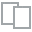
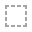
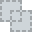
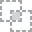
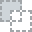
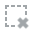
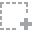
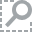
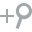
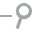
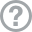
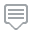
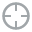
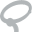
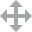
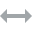
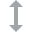
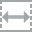
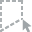
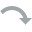
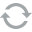
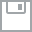
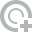
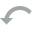
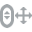
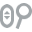
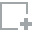
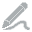
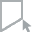
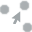
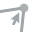
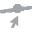

In [1]:
from dataprep.eda import plot
import pandas as pd

df = pd.read_csv("faculty_grad_year.csv")
df["age"] = 2023+23-df["graduate_year"]

plot(df, "age")

## Submission

Complete the code in this notebook, and submit it to the Canvas assignment `Assignment 1`.